In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../../feature_engineering/datasets/built_dataset.csv")
df.info() #Gives Information about null data and more

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440716 entries, 0 to 440715
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   item_name                  440716 non-null  object 
 1   category_name              440716 non-null  object 
 2   date                       440716 non-null  object 
 3   time                       440716 non-null  int64  
 4   item_code                  440716 non-null  int64  
 5   quantity_sold_kg           440716 non-null  float64
 6   unit_selling_price_rmb/kg  440716 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 23.5+ MB


In [3]:
df = df.drop(columns=['item_code', 'unit_selling_price_rmb/kg', 'date', 'time'])

In [4]:
df.shape

(440716, 3)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/p1/plqqz3vn75d873bd3kj4mtgw0000gn/T/ipykernel_99170/2690050114.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['quantity_sold_kg']) #Graph is right skewed and to observe the outliers better boxplot  can be used


<Axes: xlabel='quantity_sold_kg', ylabel='Density'>

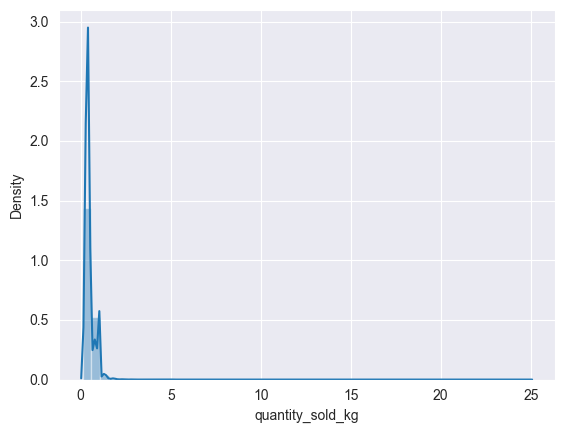

In [6]:
sns.distplot(df['quantity_sold_kg']) #Graph is right skewed and to observe the outliers better boxplot  can be used

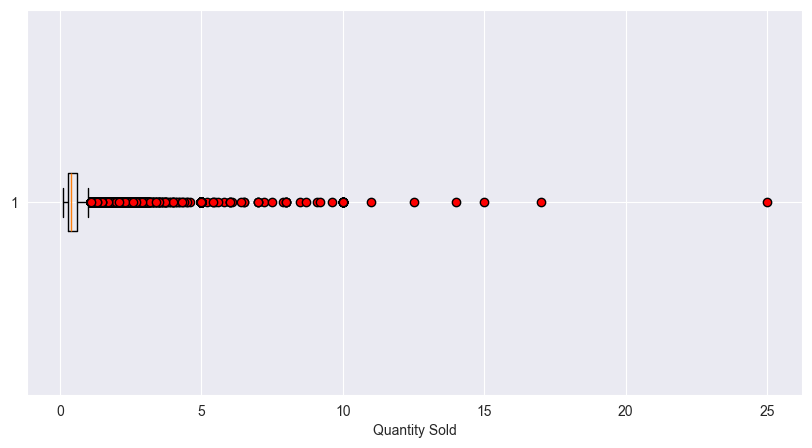

In [7]:
#Visualizing the outliers using boxplot
plt.figure(figsize=(10,5))
plt.boxplot(df['quantity_sold_kg'], vert=False, flierprops=dict(markerfacecolor='Red', marker='o'))
plt.xlabel('Quantity Sold')
plt.show()

In [8]:
#Mean before handling the outliers
print(df['quantity_sold_kg'].mean())

0.48137644197170043


In [9]:
#Defining the limits
upper_limit = df['quantity_sold_kg'].mean() + 3*df['quantity_sold_kg'].std()
lower_limit = df['quantity_sold_kg'].mean() - 3*df['quantity_sold_kg'].std()
print('Upper limit: ',upper_limit,' lower limit: ',lower_limit)

Upper limit:  1.472587883063381  lower limit:  -0.50983499911998


In [10]:
#Finding the outliers
df.loc[(df['quantity_sold_kg'] > upper_limit) | (df['quantity_sold_kg'] < lower_limit)]

,item_name,category_name,quantity_sold_kg
15,net lotus root,aquatic,1.6
20,net lotus root,aquatic,1.6
125,net lotus root,aquatic,1.8
345,net lotus root,aquatic,3.1
375,net lotus root,aquatic,1.7
...,...,...,...
440472,powcan mountain chinese cabbage,flower,1.7
440532,net lotus root,aquatic,1.5
440605,net lotus root,aquatic,2.6
440629,powcan mountain chinese cabbage,flower,1.5


In [11]:
df_filtered = df.loc[(df['quantity_sold_kg'] < upper_limit) & (df['quantity_sold_kg'] > lower_limit)]

In [12]:
len(df),len(df_filtered),len(df)-len(df_filtered)

(440716, 437058, 3658)

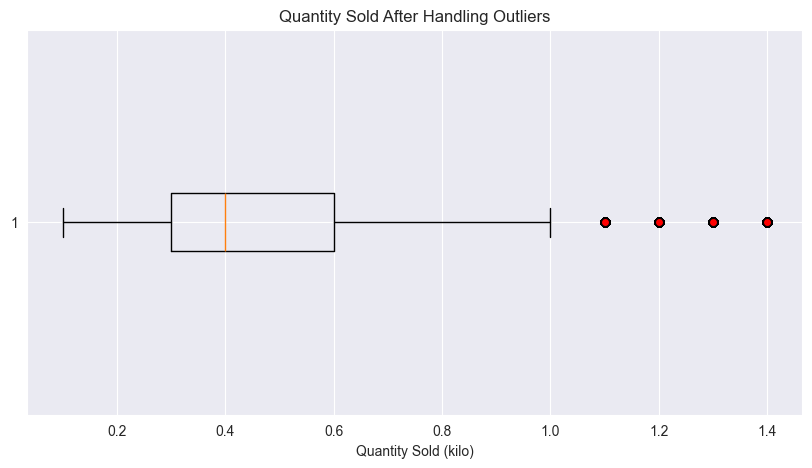

In [13]:
#After handling outliers
plt.figure(figsize=(10,5))
plt.boxplot(df_filtered['quantity_sold_kg'], vert=False, flierprops=dict(markerfacecolor='Red', marker='o'))
plt.xlabel('Quantity Sold (kilo)')
plt.title('Quantity Sold After Handling Outliers')
plt.show()

In [14]:
#Further Handling Outliers
#df_filtered = df[df['Quantity Sold (kilo)'] < 1] #Removing everything above 20

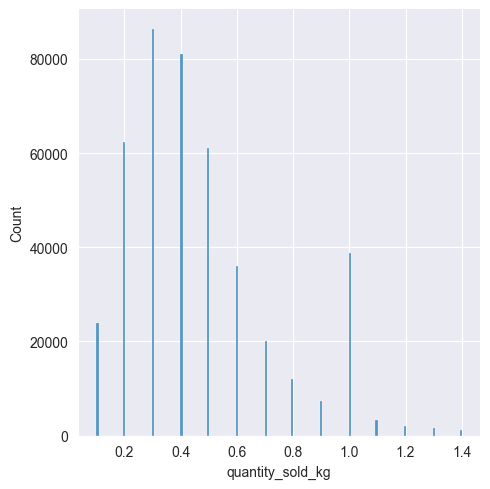

In [15]:
sns.displot(df_filtered['quantity_sold_kg'])

In [16]:
print(df_filtered['quantity_sold_kg'].mean()) # Mean value has only slightly changed

0.46684696310329526


In [17]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 437058 entries, 0 to 440715
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   item_name         437058 non-null  object 
 1   category_name     437058 non-null  object 
 2   quantity_sold_kg  437058 non-null  float64
dtypes: float64(1), object(2)
memory usage: 13.3+ MB


In [18]:
#Handling the index number error 
#There are 729881 entries but the index goes till 737336
df_final = df_filtered.reset_index(drop=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437058 entries, 0 to 437057
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   item_name         437058 non-null  object 
 1   category_name     437058 non-null  object 
 2   quantity_sold_kg  437058 non-null  float64
dtypes: float64(1), object(2)
memory usage: 10.0+ MB


In [19]:
#Encoding
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#df_final['Item Name'] = le.fit_transform(df['Item Name'])
#df_final['Category Name'] = le.fit_transform(df['Category Name'])

In [20]:
#df_final = pd.get_dummies(df_final) #One Hot Encoding method

In [21]:
df_final.to_csv('../datasets/pre_processed_data.csv', index=False)